In [1]:
%run _init.py
%matplotlib inline
%config InlineBackend.figure_format = 'png'

# Monte Carlo
## Area estimation

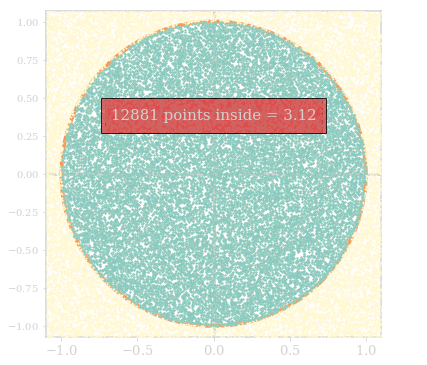

In [2]:
# params
domain = np.linspace(-np.pi,np.pi,500)
Nunif = [500, 1000, 5000, 10000, 20000]
x0=0
y0=0
r=1
squareCoords = {
    'low': -1.1,
    'high': 1.1
}

# check if a point is in the unit circle center (x0,y0|r=radius)
def circheck(x,y,x0=0,y0=0,r=1):
    return (x-x0)**2+(y-y0)**2 <= r**2

# make a circle
x = np.cos(domain)
y = np.sin(domain)

# construct uniform arrays
unif = [{
    'x': np.random.uniform(**squareCoords, size=N),
    'y': np.random.uniform(**squareCoords, size=N)
} for N in Nunif]

inCircle = []
boolInds = []
for i in range(len(Nunif)):
    cUn = {'x':[],'y':[]}
    tmpBools = []
    for j in range(Nunif[i]):
        if circheck(unif[i]['x'][j],unif[i]['y'][j]):
            cUn['x'].append(unif[i]['x'][j])
            cUn['y'].append(unif[i]['y'][j])
            tmpBools.append(True)
        else:
            tmpBools.append(False)
    inCircle.append(cUn);
    boolInds.append(tmpBools);

fig = pyp.figure(figsize=(6,6))
ax = fig.subplots()
# need to make, 2 axes per Nunif (in+text,out) + 
#   1 ax circle, concatOrig will add 1
axs = utils.multiX(ax=ax,concatOriginal=False,n=len(Nunif)*2)
for a in axs:
    a.axis('off');

axs.append(ax) #put the original axis at the bottom
# circle on top axis
axs[-1].plot(x,y, color = col['orange'], lw= 4, zorder = 100);
# add zero coordinates
axs[-1].axvline(0, color=col['grey'], lw=3, zorder=0);
axs[-1].axhline(0, color=col['grey'], lw=3, zorder=0);
axs[-1].spines['top'].set_visible(True)
axs[-1].spines['right'].set_visible(True)
axs[-1].axis('equal');

## Loop through and plot all the axes
for pos in range(0,len(axs)-1,2):
    #pos = 0
    axs[pos].scatter(**unif[pos//2], color=col['offwhite'], s=1 )
    axs[pos+1].scatter(**inCircle[pos//2], color = col['blue'], s=1.75)
    for i in [pos,pos+1]:
        axs[i].axis('equal');
        axs[i].set_xlim([-1.1,1.1]);
        axs[i].set_ylim([-1.1,1.1]);
    # text
    npts = np.sum(boolInds[pos//2])
    axs[pos+1].text(
        0.5,
        0.7,
        '{0:d} points inside = {1:0.2f}'.format(npts,npts/Nunif[pos//2]*((1.1+1.1)**2)),
        verticalalignment='top', horizontalalignment='center',
        color=col['grey'], 
        fontsize=15,
        transform=axs[pos+1].transAxes,
        bbox={'facecolor':col['red'], 'alpha':0.8,'pad':10}
    )

# save
fig.savefig('../img/montecarloCircle.svg', transparent=True)

# Gaussian Precentages

In [3]:
# Make a gaussian distribution with sd ranges highlighted a different color
np.random.seed(726842)
N = 25000
MU = 0
SD = 1
xDomain = {'low': -3.5, 'high':3.5}
X = np.linspace(xDomain['low'],xDomain['high'],num=500)
DIST = stats.norm;
yDomain = {'low': 0, 'high':np.max(DIST.pdf(X,MU,SD))*1.1}

In [4]:
points = {
    'x': np.random.uniform(**xDomain,size=N),
    'y': np.random.uniform(**yDomain, size=N)
}

indices = np.full(N,False)
for i in range(N):
    indices[i] = points['y'][i] <= DIST.pdf(points['x'][i], MU, SD)
#Drop outside points
points['x'] = points['x'][indices]
points['y'] = points['y'][indices]
nPts = points['x'].shape[-1];


ptColors = [];
counts = {col['blue']: 0, col['green']: 0, col['orange']: 0, col['grey']: 0}

for i in range(nPts):
    if -1*SD < points['x'][i] < SD:
        counts[col['blue']]+= 1
        ptColors.append(col['blue'])
        next
    elif -2*SD < points['x'][i] <= -1*SD or 1*SD<= points['x'][i] < 2*SD:
        counts[col['green']]+= 1
        ptColors.append(col['green'])
        next
    elif -3*SD < points['x'][i] <= -2*SD or 2*SD<= points['x'][i] < 3*SD:
        counts[col['orange']]+= 1
        ptColors.append(col['orange'])
        next
    else:
        counts[col['grey']]+= 1
        ptColors.append(col['grey'])
        next
ptColors = np.array(ptColors);
for key in counts.keys():
    counts[key] /= nPts*2;
print(counts)

{'#88C9C1': 0.3443488943488944, '#73B55B': 0.13292383292383292, '#F79A52': 0.021437346437346436, '#d2d2d2': 0.0012899262899262898}


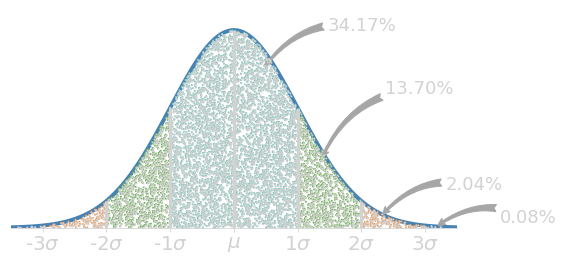

In [61]:
## testing
fig = pyp.figure(figsize=(8,4));
ax = fig.subplots();
axs = utils.multiX(ax,n=6,concatOriginal=True,concatFirst=False)
xLines = np.arange(-3,4);
xLabels = [f'{xpos:d}'+'$\sigma$' for xpos in xLines];
xLabels[3] = r'$\mu$'

axs[6].plot(X, DIST.pdf(X,MU,SD),color = col['satBlue'],lw=4,zorder=200);
axs[6].set_xlim(sorted(list(xDomain.values())));
axs[6].set_ylim(sorted(list(yDomain.values())));
axs[6].set_xticks(xLines)
axs[6].set_xticklabels(xLabels);
axs[6].spines['left'].set_visible(False);
axs[6].set_yticks([])
axs[6].tick_params(axis='x', labelsize = 20);

colRange = list(set(ptColors));
colRange.append(col['grey']);



for aI in range(0,len(axs)-3):
    inds = ptColors == colRange[aI];
    axs[aI].scatter(points['x'][inds],points['y'][inds],color=ptColors[inds],s=1);
    axs[aI].axis('off');
    axs[aI].set_xlim(sorted(list(xDomain.values())));
    axs[aI].set_ylim(sorted(list(yDomain.values())));
    textX = np.mean(np.abs(points['x'][inds]))
    textY = DIST.pdf(textX,MU,SD)
    axs[aI].annotate(f'{counts[colRange[aI]]*100:2.2f}%',
        xy= (textX,textY*0.9), xycoords='data',
        xytext = (textX+1,DIST.pdf(textX-0.5,MU,SD)), textcoords='data',
        size = 18,
        arrowprops= {
            'arrowstyle': 'fancy',
            'connectionstyle': 'arc3,rad=0.3',
            'edgecolor': col['grey2'],
            'facecolor': col['grey2']
        }
    )

axs[4].scatter(points['x'],points['y'],color=col['grey'],s=0.5);
axs[4].axis('off');
axs[4].set_xlim(sorted(list(xDomain.values())));
axs[4].set_ylim(sorted(list(yDomain.values())));
    
# now add all the vertical lines
axs[5].vlines(
    x= xLines,
    ymin= 0,
    ymax = DIST.pdf(xLines,MU,SD),
    colors = col['grey'],
    linestyles= 'solid',
    linewidths= 3,
    zorder=0
);
axs[5].set_xlim(sorted(list(xDomain.values())));
axs[5].set_ylim(sorted(list(yDomain.values())));
axs[5].axis('off');

#fig.savefig('../img/GaussianMC.svg', transparent=True)

## Gaussian pdfs

In [57]:
# Reuse above
# make 
gaussVariates = DIST.rvs(MU,SD,2000);
gaussDots = st.makeDots(gaussVariates,type='con');
gaussDots.pop('kernel')
samples = [];
for i in range(5):
    randomInds = np.random.randint(0,high=2000, size = 5)
    samples.append(
        {
            'x': gaussDots['x'][randomInds],
            'y': gaussDots['y'][randomInds]
        }
    )
SE= np.std(gaussVariates)/np.sqrt(2000);


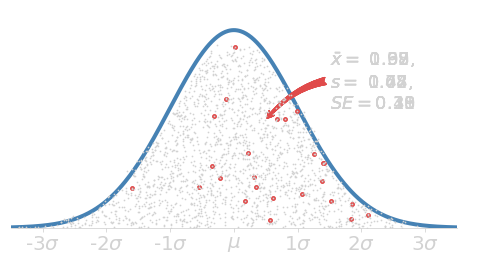

In [58]:
fig = pyp.figure(figsize=(8,4));
ax = fig.subplots();
axs = utils.multiX(ax,n=6,concatOriginal=True,concatFirst=False)
xLines = np.arange(-3,4);
xLabels = [f'{xpos:d}'+'$\sigma$' for xpos in xLines];
xLabels[3] = r'$\mu$'

# Plot the main axes with the pdf
axs[6].plot(X, DIST.pdf(X,MU,SD),color = col['satBlue'],lw=4,zorder=200);
axs[6].set_xlim(sorted(list(xDomain.values())));
axs[6].set_ylim(sorted(list(yDomain.values())));
axs[6].set_xticks(xLines)
axs[6].set_xticklabels(xLabels);
axs[6].spines['left'].set_visible(False);
axs[6].set_yticks([])
axs[6].tick_params(axis='x', labelsize = 20);

# plot the light grey points
axs[5].scatter(**gaussDots,color=col['grey'],s=0.5);
axs[5].axis('off');
axs[5].set_xlim(sorted(list(xDomain.values())));
axs[5].set_ylim(sorted(list(yDomain.values())));


## plot  the rest of the axes
for aI in range(0,len(axs)-2):
    axs[aI].scatter(**samples[aI], color=col['red'],marker='.', s=60);
    axs[aI].axis('off');
    axs[aI].set_xlim(sorted(list(xDomain.values())));
    axs[aI].set_ylim(sorted(list(yDomain.values())));
    textX = np.mean(np.abs(samples[aI]['x']))
    textY = DIST.pdf(1,MU,SD)
    theText = r'$\bar{x}=$' + f' {textX:0.2f},\n' 
    theText +=  r'$s=$' +  f" {np.std(samples[aI]['x']):0.2f},\n" 
    theText +=  r'$SE=$' + f"{np.std(samples[aI]['x'])/np.sqrt(5):0.2f}"
    axs[aI].annotate(theText,
        xy= (0.5,textY*0.9), xycoords='data',
        xytext = (1.5,DIST.pdf(0,MU,SD)*0.9), textcoords='data',
        size = 18,
        va = 'top',
        arrowprops= {
            'arrowstyle': 'fancy',
            'connectionstyle': 'arc3,rad=0.3',
            'edgecolor': col['red'],
            'facecolor': col['red']
        }
    )


fig.savefig('../img/GaussianSampling.svg', transparent=True)

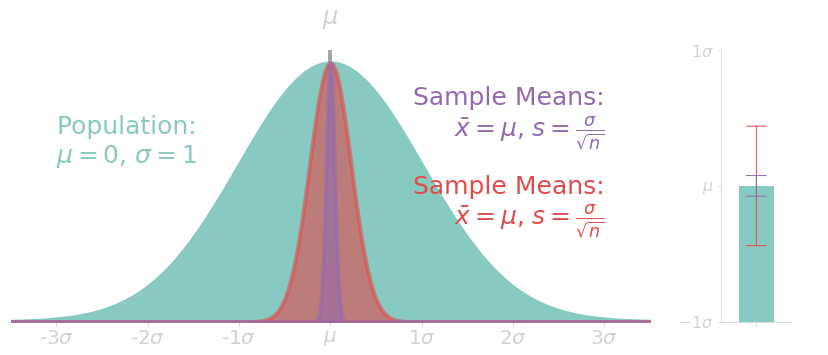

In [111]:
fig = pyp.figure(figsize=(14,5));
ax,ol = fig.subplots(1,2, gridspec_kw={'width_ratios':[9,1]});
ols = utils.multiX(ol,n=2,concatOriginal=True,concatFirst=False)
axs = utils.multiX(ax,n=2,concatOriginal=True,concatFirst=False)
xLines = np.arange(-3,4);
xLabels = [f'{xpos:d}'+'$\sigma$' for xpos in xLines];
xLabels[3] = r'$\mu$'

# Plot the main axes with the pdf
axs[2].fill_between(X, DIST.pdf(X,MU,SD),color = col['blue'],lw=4,zorder=200);
axs[2].set_xlim(sorted(list(xDomain.values())));
axs[2].set_ylim(0);
axs[2].set_xticks(xLines)
axs[2].set_xticklabels(xLabels);
axs[2].spines['left'].set_visible(False);
axs[2].set_yticks([])
axs[2].vlines(0,0,DIST.pdf(0,MU,SD)*1.1,color=col['grey2'],lw=4,zorder=0);
axs[2].text(0, DIST.pdf(0,MU,SD)*1.15,r'$\mu$',ha='center',size=24);
axs[2].tick_params(axis='x', labelsize = 20);
axs[2].text(
    -3, 
    DIST.pdf(-1,MU,SD), 
    "Population:\n$\mu=$" + f'{MU:0.2g}'+ ", $\sigma=$" + f'{SD:0.2g}', 
    size=25, 
    color=col["blue"],
    ha='left'
);

# Plot the standard Error distribution
axs[1].fill_between(X, DIST.pdf(X,MU,SE*2),color = col['purple'],lw=4,zorder=200,alpha=0.6);
axs[1].set_xlim(sorted(list(xDomain.values())));
axs[1].set_ylim(0);
axs[1].axis('off');
axs[1].text(
    3, 
    DIST.pdf(0,MU,SE)/3, 
    "Sample Means:\n" + r"$\bar{x}=\mu$, $s=\frac{\sigma}{\sqrt{n}}$",
    size=25, 
    color=col["purple"],
    ha='right'
);

# Plot the standard Error distribution (small N)
axs[0].fill_between(X, DIST.pdf(X,MU,SE*10),color = col['red'],lw=4,zorder=200,alpha=0.6);
axs[0].set_xlim(sorted(list(xDomain.values())));
axs[0].set_ylim(0);
axs[0].axis('off');
axs[0].text(
    3, 
    DIST.pdf(0,MU,SE*10)/3, 
    "Sample Means:\n" + r"$\bar{x}=\mu$, $s=\frac{\sigma}{\sqrt{n}}$",
    size=25, 
    color=col["red"],
    ha='right'
);

# Bar plot
ols[2].bar(1,1,width=0.5,color=col['blue']);
ols[2].set_xlim([0.5,1.5]);
ols[2].set_ylim([0,2]);
ols[2].set_yticks([0,1,2]);
ols[2].set_yticklabels(['$-1\sigma$','$\mu$','$1\sigma$']);
ols[2].tick_params(axis='y', labelsize = 16);
ols[2].set_xticks([1]);
ols[2].set_xticklabels(['']);

# add arrows
ols[1].add_patch(
    mpl.patches.FancyArrowPatch(
        (1,1+SE*2*2),
        (1,1-SE*2*2),
        arrowstyle = '|-|',
        mutation_scale= 10,
        color = col['purple']
    )
);
ols[1].set_ylim([0,2]);
ols[1].axis('off');

ols[0].add_patch(
    mpl.patches.FancyArrowPatch(
        (1,1+SE*10*2),
        (1,1-SE*10*2),
        arrowstyle = '|-|',
        mutation_scale= 10,
        color = col['red']
    )
);
ols[0].set_ylim([0,2]);
ols[0].axis('off');

fig.savefig('../img/GaussianSEM.svg', transparent=True)

# UCLA Salaries
## Show population and draw 3 different samples
The animation here is to color the samples drawn with red, which will then be re-hidden after the fact

In [2]:
df = pd.read_csv('data/UCLASalaries.csv');
atTheTop = df[df['Gross']>=2000000].copy();
topNames = atTheTop['Name'].ravel();
topVals = atTheTop['Gross'].ravel();
MU = df['Gross'].mean()
MED = df['Gross'].median()
SIGMA = df['Gross'].std()
SE = SIGMA/np.sqrt(df.shape[0])
print(f'MU=${MU:,.2f}',f'SIGMA=${SIGMA:,.2f}',f'SE=${SE:,.2f}',f'N={df.shape[0]:d}')

MU=$81,073.71 SIGMA=$84,421.41 SE=$457.54 N=34045


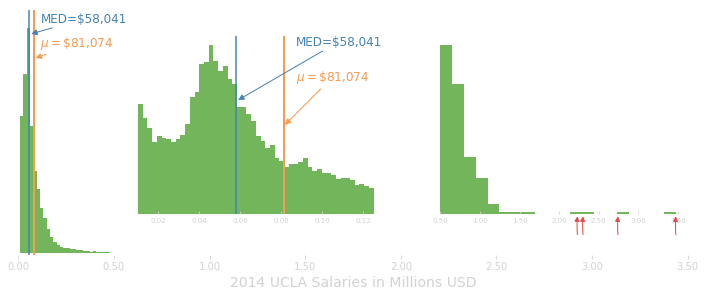

In [3]:
fig = pyp.figure(figsize=(12,4.5))
ax1 = fig.subplots()
ax2 = fig.add_axes([0.25,0.25,0.3,0.55])
ax3 = fig.add_axes([0.6,0.25,0.3,0.55])
##LABELS
ax1.set_label('ALL')
ax2.set_label('LOW')
ax3.set_label('HIGH')

## axes 1
ax1.hist(df['Gross'],bins=200,density=True, color = col['green']);
# ax1.scatter(
#     df['Gross'],
#     np.zeros(df['Gross'].shape)-0.0000001, 
#     marker='|', 
#     color=col['purple'], 
#     zorder=100, 
#     alpha=0.25,
#     s=10
# );
ax1.set_xlim([0,3500000])
ax1.set_ylim([-0.0000001,0.000014])
ax1.set_xlabel('2014 UCLA Salaries in Millions USD',size=14);
ax1.axvline(MU, color = col['orange'], lw=2)
ax1.axvline(MED, color = col['satBlue'])
ax1.annotate(
    r'$\mu=$'+f'\${MU:,.0f}',
    xy= (MU,0.000014*0.8),
    xytext= (MED*2,0.000014*0.85),
    xycoords= 'data',
    textcoords='data',
    size= 12,
    color= col['orange'],
    arrowprops= {
        'arrowstyle': '-|>',
        'edgecolor': col['orange'],
        'facecolor': col['orange']
    }
);
ax1.annotate(
    f'MED=\${MED:,.0f}',
    xy= (MED,0.000014*0.9),
    xytext= (MED*2,0.000014*0.95),
    xycoords= 'data',
    textcoords='data',
    size= 12,
    color= col['satBlue'],
    arrowprops= {
        'arrowstyle': '-|>',
        'edgecolor': col['satBlue'],
        'facecolor': col['satBlue'],
        
    }
);



## axes 2 <125000
ax2.hist(df['Gross'][df['Gross']<125000],bins=50,density=True, color = col['green']);
# ax2.scatter(
#     df['Gross'][df['Gross']<125000],
#     np.zeros(df['Gross'][df['Gross']<125000].shape), 
#     marker='|', 
#     color=col['purple'], 
#     zorder=100, 
#     alpha=0.25,
#     s=10
# );
ax2.axvline(MU, color = col['orange'], lw=2)
ax2.axvline(MED, color = col['satBlue'])
ax2.annotate(
    r'$\mu=$'+f'\${MU:,.0f}',
    xy= (MU,0.000014*0.7),
    xytext= (MED*1.5,ax2.get_ylim()[1]*0.75),
    xycoords= 'data',
    textcoords='data',
    size= 12,
    color= col['orange'],
    arrowprops= {
        'arrowstyle': '-|>',
        'edgecolor': col['orange'],
        'facecolor': col['orange']
    }
);
ax2.annotate(
    f'MED=\${MED:,.0f}',
    xy= (MED,0.000014*0.9),
    xytext= (MED*1.5,ax2.get_ylim()[1]*0.95),
    xycoords= 'data',
    textcoords='data',
    size= 12,
    color= col['satBlue'],
    arrowprops= {
        'arrowstyle': '-|>',
        'edgecolor': col['satBlue'],
        'facecolor': col['satBlue'],
        
    }
);



## axes 3
ax3.hist(df['Gross'][df['Gross']>=500000],bins=20,density=True, color = col['green']);
# ax3.scatter(
#     df['Gross'][df['Gross']>=500000],
#     np.zeros(df['Gross'][df['Gross']>=500000].shape), 
#     marker='|', 
#     color=col['purple'], 
#     zorder=100, 
#     alpha=0.25,
#     s=10
# );

## format axes:
for ax in [ax1,ax2,ax3]:
    ax.spines['bottom'].set_visible(False)
    ax.spines['left'].set_visible(False)
    ax.set_yticks([]);
    xt = ax.get_xticks();
    ax.set_xticklabels([f'{tx/10**6:1.2f}' for tx in xt]);
    if ax is not ax1:
        ax.tick_params(axis='x', labelsize = 7, direction= 'in');

ax4 = ax3.twinx();
ax4.axis('off');
for n in range(atTheTop.shape[0]):
    ax4.annotate(
        '',
        xy= (topVals[n],0), 
        xytext = (topVals[n],-ax4.get_ylim()[1]/8),
        xycoords = 'data',
        textcoords='data',
        arrowprops= {
            'arrowstyle': '-|>',
            'connectionstyle': 'arc3,rad=-0.05',
            'edgecolor': col['red'],
            'facecolor': col['red']
        }
    );

fig.savefig('../img/UCLASalariesHists-norug.svg', transparent=True)

In [6]:
atTheTop

,Year,Campus,Name,Title,Base,Overtime,Extra,Gross
34028,2014,LOS ANGELES,"ALFORD , STEPHEN TODD",INTERCOL ATH HEAD COACH EX,300000,0,2445341,2745341
34031,2014,LOS ANGELES,"BUSUTTIL , RONALD W",PROF-HCOMP,360828,0,1872093,2232921
34040,2014,LOS ANGELES,"MORA , JAMES LAWRENCE",INTERCOL ATH HEAD COACH EX,300000,0,3176127,3476127
34044,2014,LOS ANGELES,"TABSH , KHALIL M",HS CLIN PROF-HCOMP,179402,0,2123925,2303327


### UCLA Build the sample means distribution  
1. Start with frequentism
2. Overlay bootstrap

In [12]:
# Take sample of 10
#frequentist:
sampleB = [5,20,100,1000]
samples = [];
for b in sampleB:
    tmpSL = [];
    for r in range(b):
        ss = np.random.choice(df['Gross'], 10, replace=False);
        tmpSL.append(ss);
    samples.append(tmpSL);
SAMPXBAR = []
XBARS = []
SDS = []
SES = []
for smp in samples:
    #mean of means, sd of means
    theMeans = np.mean(smp,axis=1);
    SAMPXBAR.append(theMeans);
    XBARS.append(np.mean(theMeans));
    SDS.append(np.std(theMeans));
    SES.append(SIGMA/np.sqrt(theMeans.shape[0]));
print('xbar',XBARS,'sd',SDS,'se',SES)

xbar [79180.699999999997, 79233.734999999986, 83040.313999999998, 81876.048800000019] sd [17362.556813672345, 24826.712400663822, 25988.845727357806, 26024.345731547579] se [37754.40176394712, 18877.20088197356, 8442.1408794023737, 2669.6393506928362]


In [13]:
# build sample means 
# MU, SIGMA, SE from pop
spos = 0
B = 10000
NORM = stats.norm;
DOM = utils.domain(df['Gross']);
X = np.linspace(*DOM,1000);
KDE = stats.kde.gaussian_kde(df['Gross']);
xbar = np.mean(samples[0][spos]);
sdsamp = np.std(samples[0][spos],ddof=1);
sesamp = sdsamp/np.sqrt(samples[0][spos].shape[0]);
#sample for plotting
samplesDots = st.makeDots(samples[0][spos],type='dis');
samplesKDE = stats.kde.gaussian_kde(samples[0][spos]);

boots = np.random.choice(samples[0][spos], size = (B,10), replace=True);
bootT = boots.mean(axis=1)
print(bootT,bootT.shape)

## for altering dots with kde
def rescale(X,R = [0,1]):
    X=np.ravel(X);
    dom = utils.domain(X);
    output = np.zeros(X.shape);
    for i in range(X.shape[0]):
        x = X[i];
        output[i] = (R[1]-R[0])*(x-dom[0])/(dom[1]-dom[0])+R[0]
    return output


[ 110751.9   89766.5  119116.5 ...,  109445.5  105455.   116324.2] (10000,)


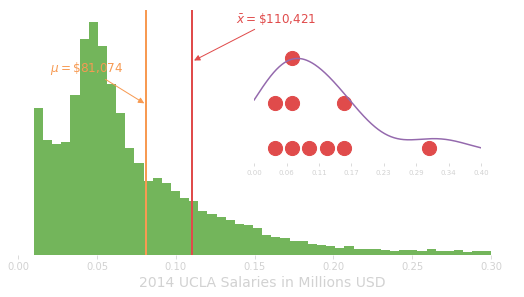

In [23]:
# Show Sample

fig = pyp.figure(figsize=(9,4.5))
ax1 = fig.subplots()
ax2 = fig.add_axes([0.5,0.4,0.35,0.4])


## axes 1 <300000
ax1.hist(df['Gross'][df['Gross']<300000],bins=50,density=True, color = col['green']);
# ax1.scatter(
#     df['Gross'][df['Gross']<300000],
#     np.zeros(df['Gross'][df['Gross']<300000].shape), 
#     marker='|', 
#     color=col['purple'], 
#     zorder=100, 
#     alpha=0.25,
#     s=10
# );
ax1.set_xlabel('2014 UCLA Salaries in Millions USD',size=14);
ax1.axvline(MU, color = col['orange'], lw=2)
ax1.axvline(xbar, color = col['red'], lw=2)
ax1.annotate(
    r'$\mu=$'+f'\${MU:,.0f}',
    xy= (MU,0.000014*0.7),
    xytext= (MU*0.25,ax1.get_ylim()[1]*0.75),
    xycoords= 'data',
    textcoords='data',
    size= 12,
    color= col['orange'],
    arrowprops= {
        'arrowstyle': '-|>',
        'edgecolor': col['orange'],
        'facecolor': col['orange']
    }
);
ax1.annotate(
    r'$\bar{x}=$'+f'\${xbar:,.0f}',
    xy= (xbar,0.000014*0.9),
    xytext= (xbar*1.25,ax1.get_ylim()[1]*0.95),
    xycoords= 'data',
    textcoords='data',
    size= 12,
    color= col['red'],
    arrowprops= {
        'arrowstyle': '-|>',
        'edgecolor': col['red'],
        'facecolor': col['red'],
        
    }
);

## Axes 2, sample Dots
ax2.scatter(**samplesDots,s=200,color=col['red']);

ax2.set_xlim((0,400000));
ax2.set_xticks(np.linspace(0,400000,8));
xs = np.linspace(*ax2.get_xlim(),500)
ax2.plot(xs,rescale(samplesKDE(xs),utils.domain(samplesDots['y'])),  color=col['purple']);
ax2.set_ylim((0.1,0.5+utils.domain(samplesDots['y'])[1]));
ax2.patch.set_alpha(0);




## Clean Axes
for ax in [ax1,ax2]:
    ax.spines['bottom'].set_visible(False)
    ax.spines['left'].set_visible(False)
    ax.set_yticks([]);
    xt = ax.get_xticks();
    ax.set_xticklabels([f'{tx/10**6:1.2f}' for tx in xt]);
    if ax is not ax1:
        ax.tick_params(axis='x', labelsize = 7, direction= 'in');

fig.savefig('../img/GaussianOneSample.svg', transparent=True)

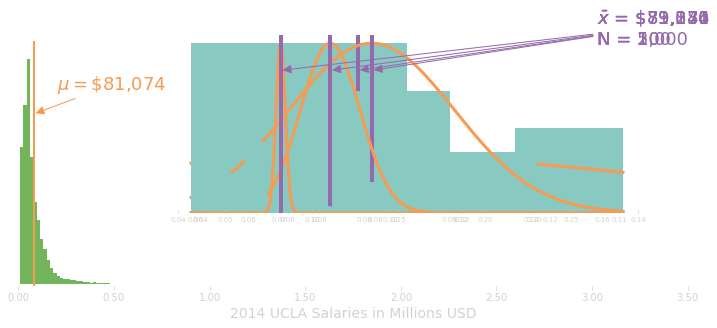

In [15]:
#Accumulate Multiple Samples
# the inset contains:
#  hist of sample with overlayed NORMAL based on XBARS,SD/sqrt(N)
fig = pyp.figure(figsize=(12,4.5))
ax1 = fig.subplots()
axs=[]
for i in range(4):
    axs.append(fig.add_axes([0.3, 0.35, 0.55, 0.55],label=f"AX{i}"));



## axes 1
ax1.hist(df['Gross'],bins=200,density=True, color = col['green']);
# ax1.scatter(
#     df['Gross'],
#     np.zeros(df['Gross'].shape)-0.0000001, 
#     marker='|', 
#     color=col['purple'], 
#     zorder=100, 
#     alpha=0.25,
#     s=10
# );
ax1.set_xlim([0,3500000])
ax1.set_ylim([-0.0000001,0.000014])
ax1.set_xlabel('2014 UCLA Salaries in Millions USD',size=14);
ax1.axvline(MU, color = col['orange'], lw=2)

ax1.annotate(
    r'$\mu=$'+f'\${MU:,.0f}',
    xy= (MU,0.000014*0.7),
    xytext= (MED*3.5,0.000014*0.8),
    xycoords= 'data',
    textcoords='data',
    size= 18,
    color= col['orange'],
    arrowprops= {
        'arrowstyle': '-|>',
        'edgecolor': col['orange'],
        'facecolor': col['orange']
    }
);

#a=0; #dev
for a in range(len(XBARS)):
    xs = np.linspace(*utils.domain(SAMPXBAR[a]),500);
    theory = NORM.pdf(xs,XBARS[a],SES[a]);
    axs[a].plot(xs,theory, color=col['orange'], lw=3);
    axs[a].hist(SAMPXBAR[a],density=True,bins='fd',color=col['blue']);
    axs[a].axvline(XBARS[a], color = col['purple'],lw=4)
    axs[a].annotate(
        r'$\bar{x}$ = '+f'\${XBARS[a]:,.0f}\n' + f'N = {len(SAMPXBAR[a]):,.0f}',
        xy= (XBARS[a],axs[a].get_ylim()[1]*0.8),
        xytext= (axs[a].get_xlim()[1]-(axs[a].get_xlim()[1]-axs[a].get_xlim()[0])*0.1,axs[a].get_ylim()[1]*0.95),
        xycoords= 'data',
        textcoords='data',
        size= 18,
        color= col['purple'],
        arrowprops= {
            'arrowstyle': '-|>',
            'edgecolor': col['purple'],
            'facecolor': col['purple']
        }
    );
    axs[a].patch.set_alpha(0);


## Clean Axes
for ax in [ax1]+axs:
    ax.spines['bottom'].set_visible(False)
    ax.spines['left'].set_visible(False)
    ax.set_yticks([]);
    xt = ax.get_xticks();
    ax.set_xticklabels([f'{tx/10**6:1.2f}' for tx in xt]);
    if ax is not ax1:
        ax.tick_params(axis='x', labelsize = 7, direction= 'in');

fig.savefig('../img/GaussianFrequentism.svg', transparent=True)

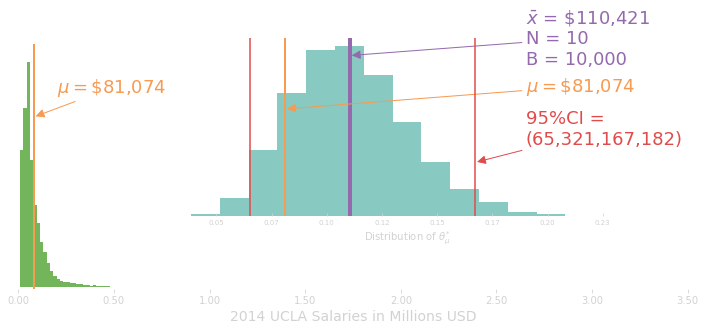

In [27]:
# BOOTSTRAP
# the inset contains:
#  hist of sample with overlayed NORMAL based on XBARS,SD/sqrt(N)
fig = pyp.figure(figsize=(12,4.5))
ax1 = fig.subplots()
ax2 = fig.add_axes([0.3, 0.35, 0.55, 0.55],label="HIST");
ax3 = ax2.twinx();

## axes 1
ax1.hist(df['Gross'],bins=200,density=True, color = col['green']);
# ax1.scatter(
#     df['Gross'],
#     np.zeros(df['Gross'].shape)-0.0000001, 
#     marker='|', 
#     color=col['purple'], 
#     zorder=100, 
#     alpha=0.25,
#     s=10
# );
ax1.set_xlim([0,3500000])
ax1.set_ylim([-0.0000001,0.000014])
ax1.set_xlabel('2014 UCLA Salaries in Millions USD',size=14);
ax1.axvline(MU, color = col['orange'], lw=2)
ax1.annotate(
    r'$\mu=$'+f'\${MU:,.0f}',
    xy= (MU,0.000014*0.7),
    xytext= (MED*3.5,0.000014*0.8),
    xycoords= 'data',
    textcoords='data',
    size= 18,
    color= col['orange'],
    arrowprops= {
        'arrowstyle': '-|>',
        'edgecolor': col['orange'],
        'facecolor': col['orange']
    }
);

## Boots
xs = np.linspace(*utils.domain(bootT),500);
theory = NORM.pdf(xs,xbar,sesamp);
#ax2.plot(xs,theory, color=col['satBlue'], lw=3);
ax2.hist(bootT,density=True,bins='sturges',color=col['blue']);
ax2.axvline(xbar, color = col['purple'],lw=4)
ax2.axvline(MU, color = col['orange'], lw=2)
# ax2.annotate(
#     r'$\sigma_{\bar{x}} = \frac{sd}{\sqrt{N_{sample}}}$',
#     xy= (170000,ax2.get_ylim()[1]*0.05),
#     xytext= (ax2.get_xlim()[1]-(ax2.get_xlim()[1]-ax2.get_xlim()[0])*0.25,ax2.get_ylim()[1]*0.15),
#     xycoords= 'data',
#     textcoords='data',
#     size= 18,
#     color= col['satBlue'],
#     arrowprops= {
#         'arrowstyle': '-|>',
#         'edgecolor': col['satBlue'],
#         'facecolor': col['satBlue']
#     }
# );

ax2.annotate(
    r'$\bar{x}$ = '+f'\${xbar:,.0f}\n' + f'N = {len(samples[0][spos]):,.0f}\n' + f'B = {B:,.0f}',
    xy= (xbar,ax2.get_ylim()[1]*0.9),
    xytext= (ax2.get_xlim()[1]-(ax2.get_xlim()[1]-ax2.get_xlim()[0])*0.25,ax2.get_ylim()[1]*0.85),
    xycoords= 'data',
    textcoords='data',
    size= 18,
    color= col['purple'],
    arrowprops= {
        'arrowstyle': '-|>',
        'edgecolor': col['purple'],
        'facecolor': col['purple']
    }
);
ax2.annotate(
    r'$\mu=$'+f'\${MU:,.0f}',
    xy= (MU,ax2.get_ylim()[1]*0.6),
    xytext= (ax2.get_xlim()[1]-(ax2.get_xlim()[1]-ax2.get_xlim()[0])*0.25,ax2.get_ylim()[1]*0.7),
    xycoords= 'data',
    textcoords='data',
    size= 18,
    color= col['orange'],
    arrowprops= {
        'arrowstyle': '-|>',
        'edgecolor': col['orange'],
        'facecolor': col['orange']
    }
);
ax2.set_xlabel(r'Distribution of $\theta^{*}_{\mu}$')
ax2.patch.set_alpha(0);

sortT = np.sort(bootT);
cilow = sortT[250];
cihigh = sortT[9750];
ax3.axvline(cilow, color = col['red'])
ax3.axvline(cihigh, color = col['red'])
ax3.set_xlabel('')
ax3.annotate(
    f'95%CI =\n({cilow:,.0f},{cihigh:,.0f})',
    xy= (cihigh,ax3.get_ylim()[1]*0.3),
    xytext= (ax3.get_xlim()[1]-(ax3.get_xlim()[1]-ax3.get_xlim()[0])*0.25,ax3.get_ylim()[1]*0.4),
    xycoords= 'data',
    textcoords='data',
    size= 18,
    color= col['red'],
    arrowprops= {
        'arrowstyle': '-|>',
        'edgecolor': col['red'],
        'facecolor': col['red']
    }
);

## Clean Axes
for ax in [ax1,ax2,ax3]:
    ax.spines['bottom'].set_visible(False)
    ax.spines['left'].set_visible(False)
    ax.set_yticks([]);
    xt = ax.get_xticks();
    ax.set_xticklabels([f'{tx/10**6:1.2f}' for tx in xt]);
    if ax is not ax1:
        ax.tick_params(axis='x', labelsize = 7, direction= 'in');

fig.savefig('../img/GaussianBootstrap.svg', transparent=True)

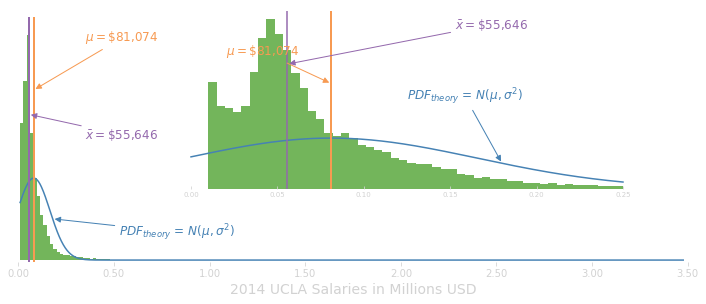

In [10]:
# T-statistic - 1 - sample
# MU, SIGMA, SE, NORM from pop
fig = pyp.figure(figsize=(12,4.5))
ax1 = fig.subplots()
ax2 = fig.add_axes([0.3, 0.35, 0.55, 0.55],label="HIST");

## axes 1
ax1.hist(df['Gross'],bins=200,density=True, color = col['green']);
ax1.plot(X,NORM.pdf(X,MU,SIGMA),color = col['satBlue']);
ax1.set_xlim([0,3500000])
ax1.set_ylim([-0.0000001,0.000014])
ax1.set_xlabel('2014 UCLA Salaries in Millions USD',size=14);
ax1.axvline(MU, color = col['orange'], lw=2)
ax1.axvline(xbar, color = col['purple'], lw=2)
ax1.annotate(
    r'$\mu=$'+f'\${MU:,.0f}',
    xy= (MU,ax1.get_ylim()[1]*0.7),
    xytext= (ax1.get_xlim()[0]+(ax1.get_xlim()[1]-ax1.get_xlim()[0])*0.1,ax1.get_ylim()[1]*0.9),
    xycoords= 'data',
    textcoords='data',
    size= 12,
    color= col['orange'],
    arrowprops= {
        'arrowstyle': '-|>',
        'edgecolor': col['orange'],
        'facecolor': col['orange']
    }
);
ax1.annotate(
    r'$PDF_{theory}$ = $N(\mu,\sigma^2)$',
    xy= (180000,NORM.pdf(180000,MU,SIGMA)),
    xytext= (ax1.get_xlim()[0]+(ax1.get_xlim()[1]-ax1.get_xlim()[0])*0.15,ax1.get_ylim()[1]*0.1),
    xycoords= 'data',
    textcoords='data',
    size= 12,
    color= col['satBlue'],
    arrowprops= {
        'arrowstyle': '-|>',
        'edgecolor': col['satBlue'],
        'facecolor': col['satBlue']
    }
);
ax1.annotate(
    r'$\bar{x}=$'+f'\${xbar:,.0f}',
    xy= (xbar,ax1.get_ylim()[1]*0.6),
    xytext= (ax1.get_xlim()[0]+(ax1.get_xlim()[1]-ax1.get_xlim()[0])*0.1,ax1.get_ylim()[1]*0.5),
    xycoords= 'data',
    textcoords='data',
    size= 12,
    color= col['purple'],
    arrowprops= {
        'arrowstyle': '-|>',
        'edgecolor': col['purple'],
        'facecolor': col['purple']
    }
);


## axes 2 <125000
truncX = np.linspace(0,250000,500)
ax2.hist(df['Gross'][df['Gross']<250000],bins=50,density=True, color = col['green']);
ax2.plot(truncX,NORM.pdf(truncX,MU,SIGMA),color = col['satBlue'])
ax2.axvline(MU, color = col['orange'], lw=2)
ax2.axvline(xbar, color = col['purple'])
ax2.annotate(
    r'$\mu=$'+f'\${MU:,.0f}',
    xy= (MU,0.000014*0.7),
    xytext= (MU*0.25,ax2.get_ylim()[1]*0.75),
    xycoords= 'data',
    textcoords='data',
    size= 12,
    color= col['orange'],
    arrowprops= {
        'arrowstyle': '-|>',
        'edgecolor': col['orange'],
        'facecolor': col['orange']
    }
);
ax2.annotate(
    r'$PDF_{theory}$ = $N(\mu,\sigma^2)$',
    xy= (180000,NORM.pdf(180000,MU,SIGMA)),
    xytext= (ax2.get_xlim()[0]+(ax2.get_xlim()[1]-ax2.get_xlim()[0])*0.5,ax2.get_ylim()[1]*0.5),
    xycoords= 'data',
    textcoords='data',
    size= 12,
    color= col['satBlue'],
    arrowprops= {
        'arrowstyle': '-|>',
        'edgecolor': col['satBlue'],
        'facecolor': col['satBlue']
    }
);
ax2.annotate(
    r'$\bar{x}=$'+f'\${xbar:,.0f}',
    xy= (xbar,ax2.get_ylim()[1]*0.7),
    xytext= (ax2.get_xlim()[1]-(ax2.get_xlim()[1]-ax2.get_xlim()[0])*0.4,ax2.get_ylim()[1]*0.9),
    xycoords= 'data',
    textcoords='data',
    size= 12,
    color= col['purple'],
    arrowprops= {
        'arrowstyle': '-|>',
        'edgecolor': col['purple'],
        'facecolor': col['purple']
    }
);
ax2.patch.set_alpha(0);

## Clean Axes
for ax in [ax1,ax2]:
    ax.spines['bottom'].set_visible(False)
    ax.spines['left'].set_visible(False)
    ax.set_yticks([]);
    xt = ax.get_xticks();
    ax.set_xticklabels([f'{tx/10**6:1.2f}' for tx in xt]);
    if ax is not ax1:
        ax.tick_params(axis='x', labelsize = 7, direction= 'in');

fig.savefig('../img/GaussianT_Test_withDist.svg', transparent=True)

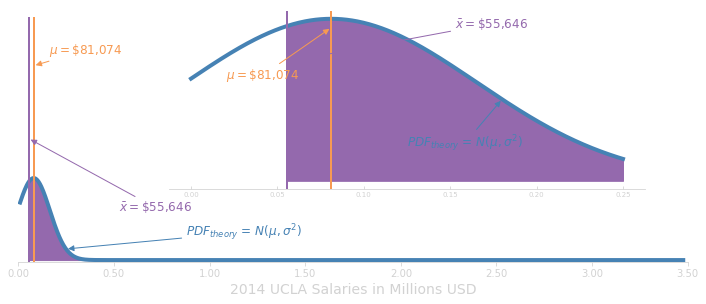

In [11]:
# T-statistic - 1 - sample NO DIST
# MU, SIGMA, SE, NORM from pop
fig = pyp.figure(figsize=(12,4.5))
ax1 = fig.subplots()
ax2 = fig.add_axes([0.3, 0.35, 0.55, 0.55],label="HIST");

## axes 1
ax1.plot(X,NORM.pdf(X,MU,SIGMA),color = col['satBlue'],lw=4);
ax1.set_xlim([0,3500000])
ax1.set_ylim([-0.0000001,0.000014])
ax1.set_xlabel('2014 UCLA Salaries in Millions USD',size=14);
ax1.axvline(MU, color = col['orange'], lw=2)
ax1.axvline(xbar, color = col['purple'],lw=2)
ax1.fill_between(X[X>=int(xbar)],NORM.pdf(X[X>=int(xbar)],MU,SIGMA), color = col['purple'])
ax1.annotate(
    r'$\mu=$'+f'\${MU:,.0f}',
    xy= (MU,0.000014*0.8),
    xytext= (MU*2,0.000014*0.85),
    xycoords= 'data',
    textcoords='data',
    size= 12,
    color= col['orange'],
    arrowprops= {
        'arrowstyle': '-|>',
        'edgecolor': col['orange'],
        'facecolor': col['orange']
    }
);
ax1.annotate(
    r'$PDF_{theory}$ = $N(\mu,\sigma^2)$',
    xy= (250000,NORM.pdf(250000,MU,SIGMA)),
    xytext= (ax1.get_xlim()[0]+(ax1.get_xlim()[1]-ax1.get_xlim()[0])*0.25,ax1.get_ylim()[1]*0.1),
    xycoords= 'data',
    textcoords='data',
    size= 12,
    color= col['satBlue'],
    arrowprops= {
        'arrowstyle': '-|>',
        'edgecolor': col['satBlue'],
        'facecolor': col['satBlue']
    }
);
ax1.annotate(
    r'$\bar{x}=$'+f'\${xbar:,.0f}',
    xy= (xbar,ax1.get_ylim()[1]*0.5),
    xytext= (ax1.get_xlim()[1]-(ax1.get_xlim()[1]-ax1.get_xlim()[0])*0.85,ax1.get_ylim()[1]*0.2),
    xycoords= 'data',
    textcoords='data',
    size= 12,
    color= col['purple'],
    arrowprops= {
        'arrowstyle': '-|>',
        'edgecolor': col['purple'],
        'facecolor': col['purple']
    }
);


## axes 2 <125000
truncX = np.linspace(0,250000,500)
ax2.plot(truncX,NORM.pdf(truncX,MU,SIGMA),color = col['satBlue'],lw=4)
ax2.axvline(MU, color = col['orange'], lw=2)
ax2.axvline(xbar, color = col['purple'], lw=2)
ax2.fill_between(np.linspace(int(xbar),250000,100),NORM.pdf(np.linspace(int(xbar),250000,100),MU,SIGMA), color = col['purple'])
ax2.annotate(
    r'$\mu=$'+f'\${MU:,.0f}',
    xy= (MU,ax2.get_ylim()[1]*0.9),
    xytext= (MU*0.25,ax2.get_ylim()[1]*0.6),
    xycoords= 'data',
    textcoords='data',
    size= 12,
    color= col['orange'],
    arrowprops= {
        'arrowstyle': '-|>',
        'edgecolor': col['orange'],
        'facecolor': col['orange']
    }
);
ax2.annotate(
    r'$PDF_{theory}$ = $N(\mu,\sigma^2)$',
    xy= (180000,NORM.pdf(180000,MU,SIGMA)),
    xytext= (ax2.get_xlim()[0]+(ax2.get_xlim()[1]-ax2.get_xlim()[0])*0.5,ax2.get_ylim()[1]*0.2),
    xycoords= 'data',
    textcoords='data',
    size= 12,
    color= col['satBlue'],
    arrowprops= {
        'arrowstyle': '-|>',
        'edgecolor': col['satBlue'],
        'facecolor': col['satBlue']
    }
);
ax2.annotate(
    r'$\bar{x}=$'+f'\${xbar:,.0f}',
    xy= (xbar,ax2.get_ylim()[1]*0.7),
    xytext= (ax2.get_xlim()[1]-(ax2.get_xlim()[1]-ax2.get_xlim()[0])*0.4,ax2.get_ylim()[1]*0.9),
    xycoords= 'data',
    textcoords='data',
    size= 12,
    color= col['purple'],
    arrowprops= {
        'arrowstyle': '-|>',
        'edgecolor': col['purple'],
        'facecolor': col['purple']
    }
);


## Clean Axes
for ax in [ax1,ax2]:
    ax.spines['left'].set_visible(False)
    ax.set_yticks([]);
    xt = ax.get_xticks();
    ax.set_xticklabels([f'{tx/10**6:1.2f}' for tx in xt]);
    if ax is not ax1:
        ax.tick_params(axis='x', labelsize = 7, direction= 'in');

fig.savefig('../img/GaussianT_Test_noDist.svg', transparent=True)

In [26]:
tStat1 = (xbar-MU)/(sesamp)
print(tStat1)
print(stats.ttest_1samp(samples[0][spos], MU))
print(np.mean(samples[0][spos]))
print(sesamp)
print()

1.04524454128
Ttest_1sampResult(statistic=1.0452445412768669, pvalue=0.32317004695205653)
110420.7
28076.6703447


In [28]:
# build sample means 
# MU, SIGMA, SE from pop
spos2 = 1
xbar2 = np.mean(samples[0][spos2]);
sdsamp2 = np.std(samples[0][spos2],ddof=1);
sesamp2 = sdsamp2/np.sqrt(samples[0][spos2].shape[0]);
#sample for plotting
samplesDots2 = st.makeDots(samples[0][spos2],type='dis');
samplesKDE2 = stats.kde.gaussian_kde(samples[0][spos2]);

boots2 = np.random.choice(samples[0][spos2], size = (B,10), replace=True);
bootT2 = boots2.mean(axis=1)
print(bootT2,bootT2.shape)


[ 55110.9  64403.6  49576.8 ...,  49845.1  72496.6  57065.6] (10000,)


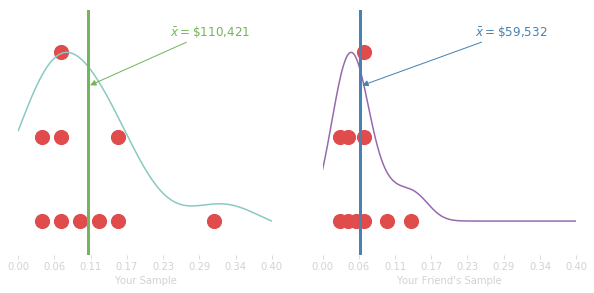

In [35]:
# BOOTSTRAP
# Show Sample

fig = pyp.figure(figsize=(10,4.5))
axs = fig.subplots(1,2)



## axes 1 <300000
axs[0].scatter(**samplesDots,s=200,color=col['red']);

axs[0].set_xlim((0,400000));
axs[0].set_xticks(np.linspace(0,400000,8));
xs = np.linspace(*axs[0].get_xlim(),500)
axs[0].plot(xs,rescale(samplesKDE(xs),utils.domain(samplesDots['y'])),  color=col['blue']);
axs[0].set_ylim((0.1,0.5+utils.domain(samplesDots['y'])[1]));
axs[0].patch.set_alpha(0);
axs[0].set_xlabel('Your Sample');
axs[0].axvline(xbar, color = col['green'], lw=3);
axs[0].annotate(
    r'$\bar{x}=$'+f'\${xbar:,.0f}',
    xy= (xbar,axs[0].get_ylim()[1]*0.7),
    xytext= (axs[0].get_xlim()[1]-(axs[0].get_xlim()[1]-axs[0].get_xlim()[0])*0.4,axs[0].get_ylim()[1]*0.9),
    xycoords= 'data',
    textcoords='data',
    size= 12,
    color= col['green'],
    arrowprops= {
        'arrowstyle': '-|>',
        'edgecolor': col['green'],
        'facecolor': col['green']
    }
);

## Axes 2, sample Dots
axs[1].scatter(**samplesDots2,s=200,color=col['red']);

axs[1].set_xlim((0,400000));
axs[1].set_xticks(np.linspace(0,400000,8));
xs = np.linspace(*axs[1].get_xlim(),500)
axs[1].plot(xs,rescale(samplesKDE2(xs),utils.domain(samplesDots2['y'])),  color=col['purple']);
axs[1].set_ylim((0.1,0.5+utils.domain(samplesDots2['y'])[1]));
axs[1].patch.set_alpha(0);
axs[1].set_xlabel("Your Friend's Sample");
axs[1].axvline(xbar2, color = col['satBlue'], lw=3);
axs[1].annotate(
    r'$\bar{x}=$'+f'\${xbar2:,.0f}',
    xy= (xbar2,axs[1].get_ylim()[1]*0.7),
    xytext= (axs[1].get_xlim()[1]-(axs[1].get_xlim()[1]-axs[1].get_xlim()[0])*0.4,axs[1].get_ylim()[1]*0.9),
    xycoords= 'data',
    textcoords='data',
    size= 12,
    color= col['satBlue'],
    arrowprops= {
        'arrowstyle': '-|>',
        'edgecolor': col['satBlue'],
        'facecolor': col['satBlue']
    }
);




## Clean Axes
for ax in axs:
    ax.spines['bottom'].set_visible(False)
    ax.spines['left'].set_visible(False)
    ax.set_yticks([]);
    xt = ax.get_xticks();
    ax.set_xticklabels([f'{tx/10**6:1.2f}' for tx in xt]);

fig.savefig('../img/GaussiantwoSample.svg', transparent=True)

In [39]:
print(samples[0][spos], xbar, sdsamp)
print(samples[0][spos2],xbar2, sdsamp2)

[123942 169083 323792  22083  41249  64931  55466  56451 144312 102898] 110420.7 88786.227403
[ 59259  35450  59198  25502 101991  21861  38046 144860  50278  58872] 59531.7 37695.6061779


In [ ]:
sortT2 = np.sort(bootT2);
cilow2 = sortT2[250];
cihigh2 = sortT2[9750];
axs[1].axvline(cilow2, color = col['red'])
axs[1].axvline(cihigh2, color = col['red'])
axs[1].annotate(
    f'95%CI =\n(\${cilow2:,.0f}, \${cihigh2:,.0f})',
    xy= (cihigh,axs[1].get_ylim()[1]*0.3),
    xytext= (axs[1].get_xlim()[1]-(axs[1].get_xlim()[1]-axs[1].get_xlim()[0])*0.45,axs[1].get_ylim()[1]*0.4),
    xycoords= 'data',
    textcoords='data',
    size= 12,
    color= col['red'],
    arrowprops= {
        'arrowstyle': '-|>',
        'edgecolor': col['red'],
        'facecolor': col['red']
    }
);

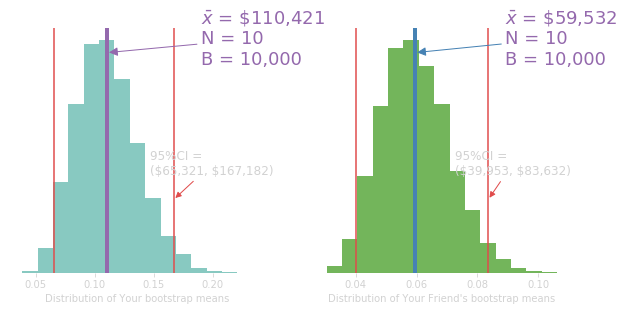

In [51]:
# BOOTSTRAP
# Show Sample

fig = pyp.figure(figsize=(10,4.5))
axs = fig.subplots(1,2)



## axes 1 <300000
xs = np.linspace(*utils.domain(bootT),500);
theory = NORM.pdf(xs,xbar,sesamp);
#axs[0].plot(xs,theory, color=col['satBlue'], lw=3);
axs[0].hist(bootT,density=True,bins='sturges',color=col['blue']);
axs[0].axvline(xbar, color = col['purple'],lw=4)
axs[0].annotate(
    r'$\bar{x}$ = '+f'\${xbar:,.0f}\n' + f'N = {len(samples[0][spos]):,.0f}\n' + f'B = {B:,.0f}',
    xy= (xbar,axs[0].get_ylim()[1]*0.9),
    xytext= (axs[0].get_xlim()[1]-(axs[0].get_xlim()[1]-axs[0].get_xlim()[0])*0.25,axs[0].get_ylim()[1]*0.85),
    xycoords= 'data',
    textcoords='data',
    size= 18,
    color= col['purple'],
    arrowprops= {
        'arrowstyle': '-|>',
        'edgecolor': col['purple'],
        'facecolor': col['purple']
    }
);
sortT = np.sort(bootT);
cilow = sortT[250];
cihigh = sortT[9750];
axs[0].axvline(cilow, color = col['red'])
axs[0].axvline(cihigh, color = col['red'])
axs[0].annotate(
    f'95%CI =\n(\${cilow:,.0f}, \${cihigh:,.0f})',
    xy= (cihigh,axs[0].get_ylim()[1]*0.3),
    xytext= (axs[0].get_xlim()[1]-(axs[0].get_xlim()[1]-axs[0].get_xlim()[0])*0.45,axs[0].get_ylim()[1]*0.4),
    xycoords= 'data',
    textcoords='data',
    size= 12,
    color= col['grey'],
    arrowprops= {
        'arrowstyle': '-|>',
        'edgecolor': col['red'],
        'facecolor': col['red']
    }
);
axs[0].set_xlabel(r'Distribution of Your bootstrap means');
axs[0].patch.set_alpha(0);

## Axes 2, sample Dots
xs2 = np.linspace(*utils.domain(bootT2),500);
theory2 = NORM.pdf(xs2,xbar2,sesamp2);
axs[1].hist(bootT2,density=True,bins='sturges',color=col['green']);

axs[1].axvline(xbar2, color = col['satBlue'], lw=4);
axs[1].annotate(
    r'$\bar{x}$ = '+f'\${xbar2:,.0f}\n' + f'N = {len(samples[0][spos2]):,.0f}\n' + f'B = {B:,.0f}',
    xy= (xbar2,axs[1].get_ylim()[1]*0.9),
    xytext= (axs[1].get_xlim()[1]-(axs[1].get_xlim()[1]-axs[1].get_xlim()[0])*0.25,axs[1].get_ylim()[1]*0.85),
    xycoords= 'data',
    textcoords='data',
    size= 18,
    color= col['purple'],
    arrowprops= {
        'arrowstyle': '-|>',
        'edgecolor': col['satBlue'],
        'facecolor': col['satBlue']
    }
);
sortT2 = np.sort(bootT2);
cilow2 = sortT2[250];
cihigh2 = sortT2[9750];
axs[1].axvline(cilow2, color = col['red'])
axs[1].axvline(cihigh2, color = col['red'])
axs[1].annotate(
    f'95%CI =\n(\${cilow2:,.0f}, \${cihigh2:,.0f})',
    xy= (cihigh2,axs[1].get_ylim()[1]*0.3),
    xytext= (axs[1].get_xlim()[1]-(axs[1].get_xlim()[1]-axs[1].get_xlim()[0])*0.45,axs[1].get_ylim()[1]*0.4),
    xycoords= 'data',
    textcoords='data',
    size= 12,
    color= col['grey'],
    arrowprops= {
        'arrowstyle': '-|>',
        'edgecolor': col['red'],
        'facecolor': col['red']
    }
);
axs[1].set_xlabel(r"Distribution of Your Friend's bootstrap means");
axs[1].patch.set_alpha(0);


## Clean Axes
for ax in axs:
    ax.spines['bottom'].set_visible(False)
    ax.spines['left'].set_visible(False)
    ax.set_yticks([]);
    xt = ax.get_xticks();
    ax.set_xticklabels([f'{tx/10**6:1.2f}' for tx in xt]);

fig.savefig('../img/GaussiantwoBootstraps.svg', transparent=True)